# Atención sanitaria

# Objetivo

El objetivo de este proyecto es analizar cómo el tipo de admisión, la condición médica del paciente y el proveedor de seguros influyen en los costos de facturación y la duración de la estancia hospitalaria. Además, se busca determinar si estas variables tienen un impacto significativo independientemente de factores como la edad, el género y el tipo de sangre. El análisis pretende identificar patrones que permitan optimizar la gestión hospitalaria y mejorar la asignación de recursos en función de las características de los pacientes.

Hipótesis

El tipo de admisión de los pacientes, junto con su condición médica y su proveedor de seguros, influye significativamente en el monto de facturación final y la duración de la estancia hospitalaria, independientemente de la edad, el género y el tipo de sangre.


# Información sobre los datos

El dataset fue tomado de Kaggle. Este conjunto de datos consta de 10.000 registros, cada uno de los cuales representa un historial clínico del paciente. Cada columna proporciona información específica sobre el paciente, su ingreso y los servicios de atención médica brindados; También inlcuye datos demográficos del paciente, detalles de admisión y más.

# Descripción del dataset
Variables:

Nombre: Esta columna representa el nombre del paciente asociado al registro de atención médica.

Edad: La edad del paciente en el momento del ingreso, expresada en años.

Género: Indica el género del paciente, ya sea “Masculino” o “Femenino”.

Tipo de sangre: El tipo de sangre del paciente, que puede ser uno de los tipos de sangre comunes (por ejemplo, "A+", "O-", etc.).

Condición médica: esta columna especifica la condición médica principal o el diagnóstico asociado con el paciente, como "Diabetes", "Hipertensión", "Asma" y más.

Fecha de ingreso: Fecha en la que el paciente fue admitido en el centro de atención médica.

Médico: Nombre del médico responsable de la atención del paciente durante su ingreso.

Hospital: Identifica el centro de salud u hospital donde fue ingresado el paciente.

Proveedor de seguros: esta columna indica el proveedor de seguros del paciente, que puede ser una de varias opciones, incluidas "Aetna", "Blue Cross", "Cigna", "UnitedHealthcare" y "Medicare".

Monto de facturación: cantidad de dinero facturada por los servicios de atención médica del paciente durante su ingreso. Se expresa como un número de punto flotante.

Número de habitación: El número de habitación donde fue alojado el paciente durante su ingreso.

Tipo de admisión: especifica el tipo de admisión, que puede ser "Emergencia", "Electiva" o "Urgente", reflejando las circunstancias de la admisión.

Fecha de alta: La fecha en la que el paciente fue dado de alta del centro de atención médica, según la fecha de ingreso y un número aleatorio de días dentro de un rango realista.

Medicación: identifica una medicación prescrita o administrada al paciente durante su ingreso. Algunos ejemplos son "aspirina", "ibuprofeno", "penicilina", "paracetamol" y "lipitor".

Resultados de la prueba: describe los resultados de una prueba médica realizada durante el ingreso del paciente. Los valores posibles incluyen "Normal", "Anormal" o "No concluyente", lo que indica el resultado de la prueba.

# Importación de librerías y lectura de datos

Se importan las librerías que utilizaremos durante el proyecto, se leen y guardan los datos.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


**Se importan librerías que se usan en el proyecto.**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/Bases de datos/Healthcare'

/content/gdrive/MyDrive/Bases de datos/Healthcare


In [ ]:
import pandas as pd

Se imprimen las primeras observaciones del dataset

In [ ]:
df= pd.read_csv ('healthcare_dataset.csv', delimiter= ';')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,"18856300000000000,00",328,Urgent,2/02/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,"33643300000000000,00",265,Emergency,26/08/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,"27955100000000000,00",205,Emergency,7/10/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,"3790980000000000,00",450,Elective,18/12/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,"14238300000000000,00",458,Urgent,9/10/2022,Penicillin,Abnormal


In [ ]:
num_filas, num_columnas = df.shape
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")


Número de filas: 9999, Número de columnas: 15


El dataset contiene 9999 observaciones y 15 variables.

#Limpieza y preprocesamiento de datos

Se realizan los siguientes pasos:
- Eliminación de columnas que no aportan información relevante.
- Eliminación de mayusculas en los nombres de los pacientes.
- Busqueda de N/A.
- Normalización del género.
- Limpieza del monto de facturación.
- Rellenar valores numéricos.
- Se elimina la admisión "Urgent" de la base de datos, el modelado no la distingue muy bien de "Emergency".

En primer lugar se eliminan las variables que no serán usadas para el análisis ni el modelado.

In [ ]:
todrop = ['Doctor', 'Room Number', 'Medication', 'Test Results', 'Hospital']
df = df.drop(columns = todrop)

Se eliminan mayúsculas en los nombres de los pacientes.

In [ ]:
# Convertir la primera letra a mayúscula y el resto a minúsculas en la columna 'Name'
df['Name'] = df['Name'].str.capitalize()



Se buscan posibles valores nulos.

In [ ]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Insurance Provider,0
Billing Amount,0
Admission Type,0
Discharge Date,0


No se encuentran valores nulos en el dataset.

Se normalizo el genero en el dataset.

In [ ]:
df['Gender'] = df['Gender'].str.capitalize()

Se busca eliminar comas y ceros adicionales.

In [ ]:
df['Billing Amount'] = df['Billing Amount'].astype(str).str.replace(',', '').str.replace('00000000000000', '').astype(float)

In [ ]:
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
print(df['Billing Amount'].head())

0   1,885,630,000,000,000,000
1   3,364,330,000,000,000,000
2   2,795,510,000,000,000,000
3     379,098,000,000,000,000
4   1,423,830,000,000,000,000
Name: Billing Amount, dtype: float64


 Se busca rellenar con la media los valores numéricos.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Discharge Date'] = df['Discharge Date'].bfill()

In [ ]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date
0,Bobby jackson,30,Male,B-,Cancer,31/01/2024,Blue Cross,"1,885,630,000,000,000,000",Urgent,2/02/2024
1,Leslie terry,62,Male,A+,Obesity,20/08/2019,Medicare,"3,364,330,000,000,000,000",Emergency,26/08/2019
2,Danny smith,76,Female,A-,Obesity,22/09/2022,Aetna,"2,795,510,000,000,000,000",Emergency,7/10/2022
3,Andrew watts,28,Female,O+,Diabetes,18/11/2020,Medicare,"379,098,000,000,000,000",Elective,18/12/2020
4,Adrienne bell,43,Female,AB+,Cancer,19/09/2022,Aetna,"1,423,830,000,000,000,000",Urgent,9/10/2022
5,Emily johnson,36,Male,A+,Asthma,20/12/2023,UnitedHealthcare,"481,451,000,000,000,000",Urgent,24/12/2023
6,Edward edwards,21,Female,AB-,Diabetes,3/11/2020,Medicare,"195,809,000,000,000,000",Emergency,15/11/2020
7,Christina martinez,20,Female,A+,Cancer,28/12/2021,Cigna,"458,205,000,000,000,000",Emergency,7/01/2022
8,Jasmine aguilar,82,Male,AB+,Asthma,1/07/2020,Cigna,"5,011,920,000,000,000,000",Elective,14/07/2020
9,Christopher berg,58,Female,AB-,Cancer,23/05/2021,UnitedHealthcare,"197,846,000,000,000,000",Elective,22/06/2021


Se elimina la fila "Urgent".

In [ ]:
df[df['Admission Type'].str.contains('urgent', case=False, na=False)]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date
0,Bobby jackson,30,Male,B-,Cancer,31/01/2024,Blue Cross,"1,885,630,000,000,000,000",Urgent,2/02/2024
4,Adrienne bell,43,Female,AB+,Cancer,19/09/2022,Aetna,"1,423,830,000,000,000,000",Urgent,9/10/2022
5,Emily johnson,36,Male,A+,Asthma,20/12/2023,UnitedHealthcare,"481,451,000,000,000,000",Urgent,24/12/2023
10,Michelle daniels,72,Male,O+,Cancer,19/04/2020,Medicare,"1,257,680,000,000,000,000",Urgent,22/04/2020
11,Aaron martinez,38,Female,A-,Hypertension,13/08/2023,Medicare,"799,959,000,000,000,000",Urgent,5/09/2023
...,...,...,...,...,...,...,...,...,...,...
9986,Paul olson,44,Female,B-,Diabetes,1/04/2020,UnitedHealthcare,"1,361,930,000,000,000,000",Urgent,11/04/2020
9989,Joann davis,66,Female,B-,Arthritis,10/03/2023,Blue Cross,"3,195,040,000,000,000,000",Urgent,11/03/2023
9990,Robin petersen,52,Male,B-,Asthma,23/03/2021,Blue Cross,"952,519,000,000,000,000",Urgent,12/04/2021
9993,Norma cobb,56,Female,A-,Arthritis,26/05/2021,Aetna,"3,336,430,000,000,000,000",Urgent,9/06/2021


In [ ]:
df = df[~df['Admission Type'].str.contains('urgent', case=False, na=False)]

#Análisis exploratorio de datos


En este apartado, se busca estudiar la relación entre variables haciendo uso de gráficos. Por otra parte, se realizan modificaciones pertinentes en el dataset cuando se consideran necesarias.
Los nombres de cada categoria se obtuvieron de la página de kaggle, citado en la sección "Descripción del dataset".

In [ ]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date
1,Leslie terry,62,Male,A+,Obesity,20/08/2019,Medicare,"3,364,330,000,000,000,000",Emergency,26/08/2019
2,Danny smith,76,Female,A-,Obesity,22/09/2022,Aetna,"2,795,510,000,000,000,000",Emergency,7/10/2022
3,Andrew watts,28,Female,O+,Diabetes,18/11/2020,Medicare,"379,098,000,000,000,000",Elective,18/12/2020
6,Edward edwards,21,Female,AB-,Diabetes,3/11/2020,Medicare,"195,809,000,000,000,000",Emergency,15/11/2020
7,Christina martinez,20,Female,A+,Cancer,28/12/2021,Cigna,"458,205,000,000,000,000",Emergency,7/01/2022
8,Jasmine aguilar,82,Male,AB+,Asthma,1/07/2020,Cigna,"5,011,920,000,000,000,000",Elective,14/07/2020
9,Christopher berg,58,Female,AB-,Cancer,23/05/2021,UnitedHealthcare,"197,846,000,000,000,000",Elective,22/06/2021
12,Connor hansen,75,Female,A+,Diabetes,12/12/2019,Cigna,"432,823,000,000,000,000",Emergency,28/12/2019
15,Ms. natalie gamble,46,Female,AB-,Obesity,1/01/2023,Blue Cross,"1,226,340,000,000,000,000",Elective,11/01/2023
16,Haley perkins,63,Female,A+,Arthritis,23/06/2020,UnitedHealthcare,"2,449,980,000,000,000,000",Elective,14/07/2020


#Distribución

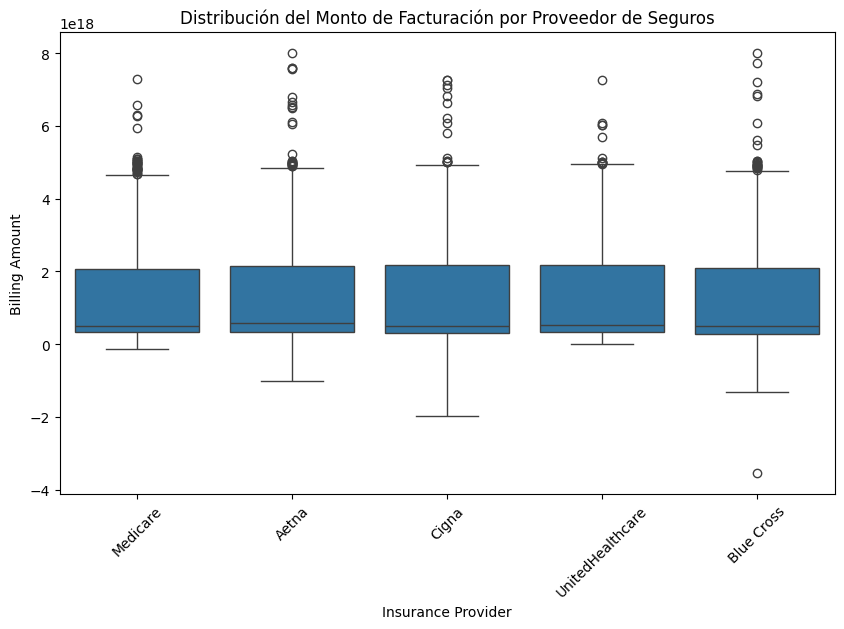

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=df)
plt.title('Distribución del Monto de Facturación por Proveedor de Seguros')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.show()

Los montos de facturación son parecidos entre los proveedores de seguros, pero destacan valores atípicos en cada grupo. Los casos con facturaciones significativamente altas podrían estar vinculados a procedimientos costosos o situaciones médicas especiales, mientras que los valores negativos atípicos podrían reflejar ajustes o correcciones en la facturación.







#Estancia del paciente por tipo de admisión

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True)

In [ ]:
# Convertir las columnas a tipo datetime con dayfirst=True
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce', dayfirst=True)
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce', dayfirst=True)

In [ ]:
# Calcular la duración de estancia
df['Duración de Estancia'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

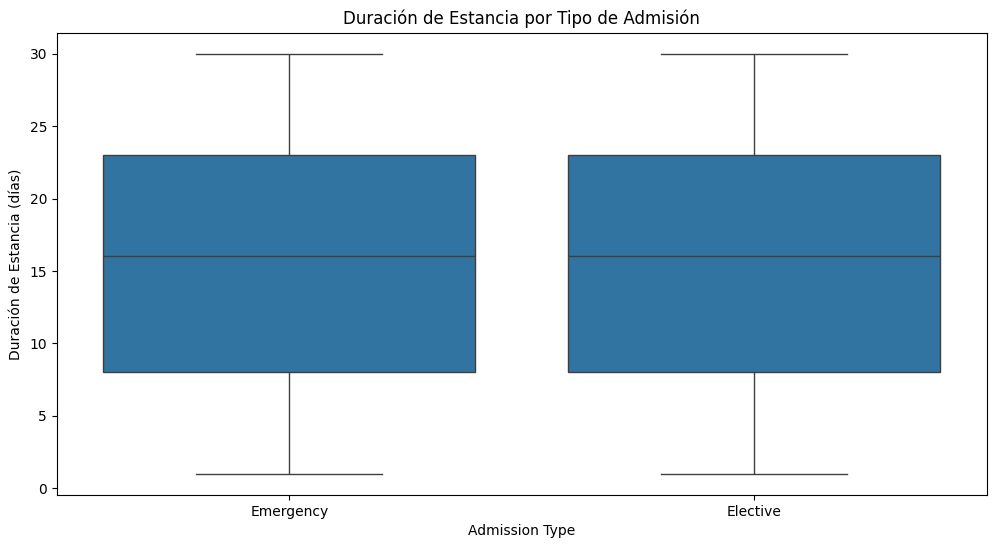

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Admission Type', y='Duración de Estancia', data=df)
plt.title('Duración de Estancia por Tipo de Admisión')
plt.xlabel('Admission Type')
plt.ylabel('Duración de Estancia (días)')
plt.show()

El tipo de admisión no parece influir de manera significativa en la duración de la estancia hospitalaria, ya que los tres grupos presentan una distribución de días muy similar.

#Impacto de Condición Médica, Seguro y Tipo de Admisión en Facturación

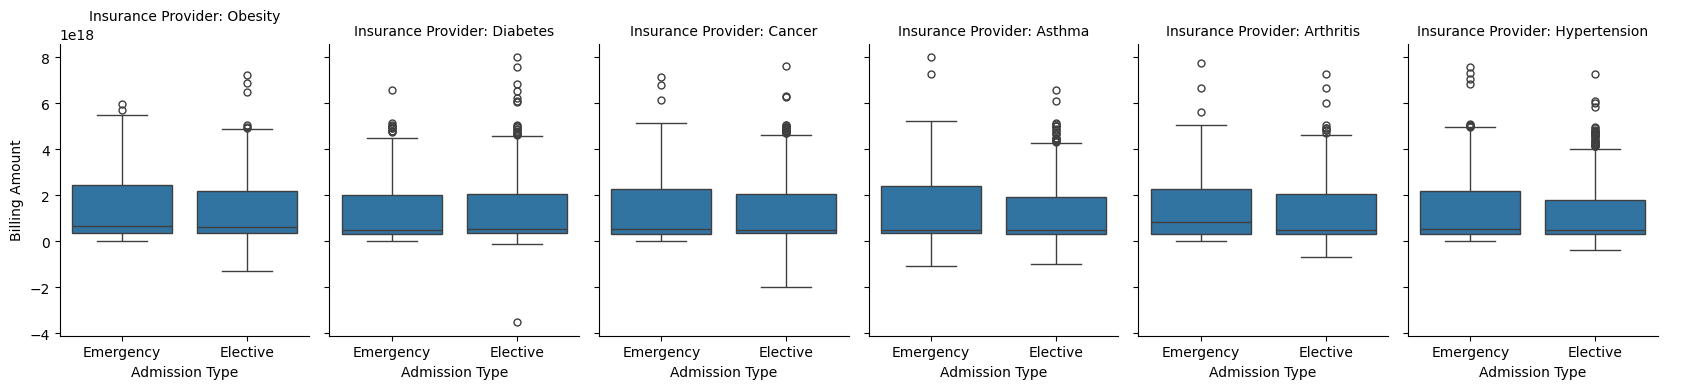

In [ ]:
g = sns.catplot(x='Admission Type', y='Billing Amount', col='Medical Condition', data=df, kind='box', height=4, aspect=0.7)
g.set_axis_labels('Admission Type', 'Billing Amount')
g.set_titles(col_template='Insurance Provider: {col_name}')
plt.show()

Los montos de facturación son similares entre los tipos de admisión, pero hay outliers en Cáncer, Diabetes, Hipertensión y Artritis. Esta variabilidad en costos puede estar ligada a la gravedad del caso, la urgencia del tratamiento o el uso de procedimientos especializados en ciertos tipos de admisión.


#Facturación

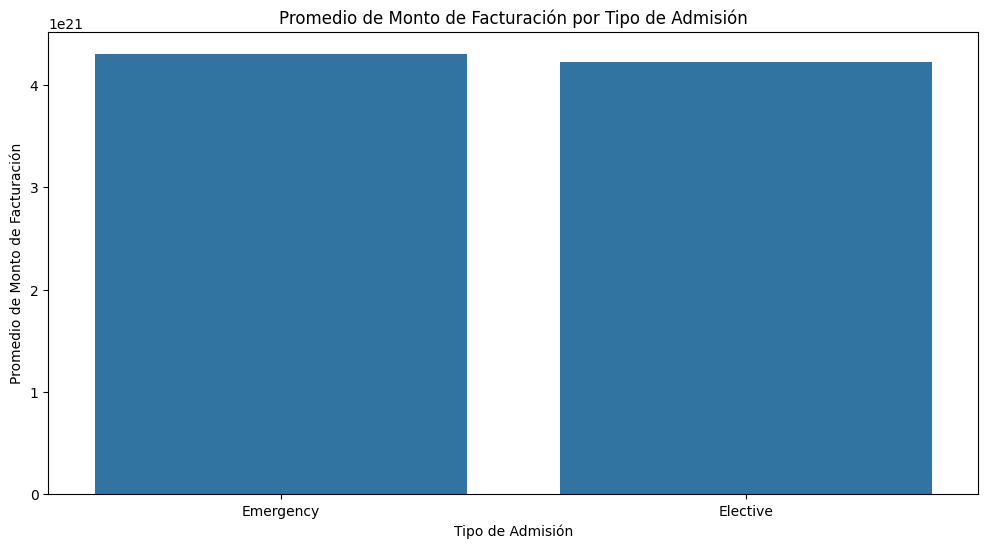

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Admission Type', y='Billing Amount', data=df, estimator=sum, errorbar=None)
plt.title('Promedio de Monto de Facturación por Tipo de Admisión')
plt.xlabel('Tipo de Admisión')
plt.ylabel('Promedio de Monto de Facturación')
plt.show()


Los montos promedio de facturación son prácticamente iguales entre las admisiones urgentes, de emergencia y electivas. Esto sugiere que el tipo de admisión no influye significativamente en los costos médicos, manteniendo una consistencia en los montos facturados.

#Media





In [ ]:
mean_cost = df.groupby('Insurance Provider')['Billing Amount'].mean().reset_index()

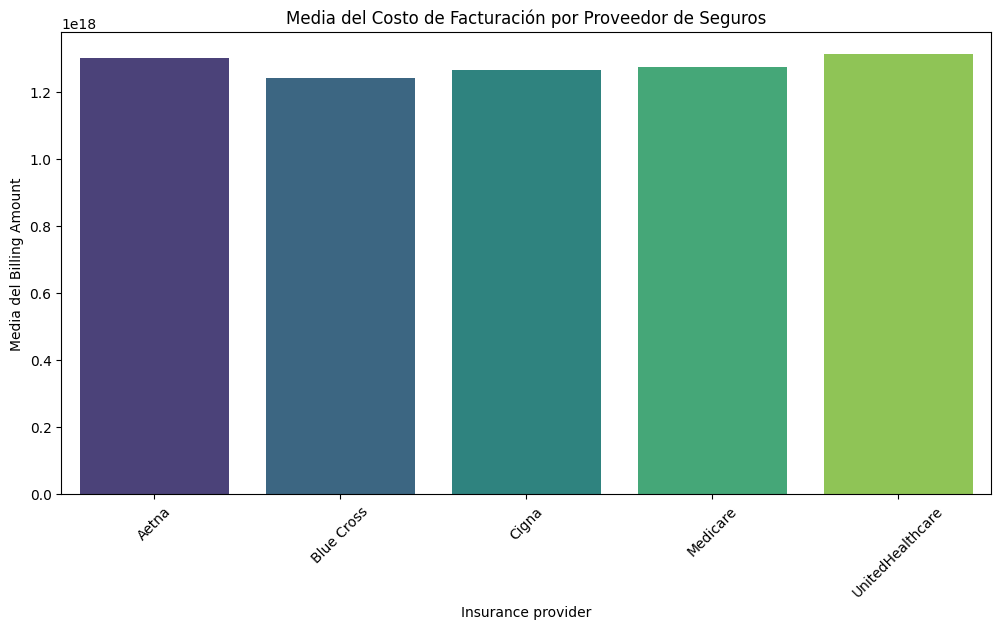

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Insurance Provider', y='Billing Amount', data=mean_cost, hue='Insurance Provider', palette='viridis', legend=False)
plt.title('Media del Costo de Facturación por Proveedor de Seguros')
plt.xticks(rotation=45)
plt.ylabel('Media del Billing Amount')
plt.xlabel('Insurance provider')
plt.show()

Los costos de facturación son similares entre los proveedores de seguros, con variabilidad limitada en los promedios.

#Estrategia de modelado

El análisis se centra en modelos supervisados, ya que nuestro objetivo es predecir variables específicas, como el Admission type.

#Modelado

El objetivo es desarrollar un modelo de aprendizaje automático que permita predecir el tipo de admisión hospitalaria, destacando la influencia clave del monto de facturación y la edad en la clasificación.
El modelo generado fue:                                          
-  Random Forest

**Preparación de los datos**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.DataFrame(df)

In [ ]:
# Convertir la columna 'Date of Admission' en un formato de fecha
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%d/%m/%Y')
# Extraer mes y año de la fecha de admisión
df['Year'] = df['Date of Admission'].dt.year
df['Month'] = df['Date of Admission'].dt.month
# Eliminar columnas no relevantes
data = df.drop(['Name', 'Age', 'Gender', 'Blood Type', 'Discharge Date', 'Date of Admission'], axis=1)

In [ ]:
# Ver las primeras filas del dataset para asegurarse de que los datos están bien cargados
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Duración de Estancia,Year,Month
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Medicare,"3,364,330,000,000,000,000",Emergency,2019-08-26,6,2019,8
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Aetna,"2,795,510,000,000,000,000",Emergency,2022-10-07,15,2022,9
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Medicare,"379,098,000,000,000,000",Elective,2020-12-18,30,2020,11
6,Edward edwards,21,Female,AB-,Diabetes,2020-11-03,Medicare,"195,809,000,000,000,000",Emergency,2020-11-15,12,2020,11
7,Christina martinez,20,Female,A+,Cancer,2021-12-28,Cigna,"458,205,000,000,000,000",Emergency,2022-01-07,10,2021,12


**Transformación a variables numéricas**

Las variables del tipo str no pueden ser interpretadas por los modelos de Machine Learning y deben ser transformadas a variables numericas. Para esto, se usa la estrategia de Label Encoding.

In [ ]:
# Revisar los valores únicos de 'Admission Type'
print(df['Admission Type'].unique())

['Emergency' 'Elective']


In [ ]:
le = LabelEncoder()
df['Admission Type Encoded'] = le.fit_transform(df['Admission Type'])

In [ ]:
le = LabelEncoder()
df['Medical Condition Encoded'] = le.fit_transform(df['Medical Condition'])

In [ ]:
le = LabelEncoder()
df['Insurance Provider Encoded'] = le.fit_transform(df['Insurance Provider'])

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Duración de Estancia,Year,Month,Admission Type Encoded,Medical Condition Encoded,Insurance Provider Encoded
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Medicare,"3,364,330,000,000,000,000",Emergency,2019-08-26,6,2019,8,1,5,3
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Aetna,"2,795,510,000,000,000,000",Emergency,2022-10-07,15,2022,9,1,5,0
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Medicare,"379,098,000,000,000,000",Elective,2020-12-18,30,2020,11,0,3,3
6,Edward edwards,21,Female,AB-,Diabetes,2020-11-03,Medicare,"195,809,000,000,000,000",Emergency,2020-11-15,12,2020,11,1,3,3
7,Christina martinez,20,Female,A+,Cancer,2021-12-28,Cigna,"458,205,000,000,000,000",Emergency,2022-01-07,10,2021,12,1,2,2


In [ ]:
# Dividir los valores entre 1,000 para mostrar en miles
df['Billing Amount'] = df['Billing Amount'] / 100

In [ ]:
# Verificar los cambios
print(df[['Billing Amount']].head())

   Billing Amount
1  33,643,300,000
2  27,955,100,000
3   3,790,980,000
6   1,958,090,000
7   4,582,050,000


In [ ]:
# Ver las primeras filas del DataFrame corregido
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Duración de Estancia,Year,Month,Admission Type Encoded,Medical Condition Encoded,Insurance Provider Encoded
1,Leslie terry,62,Male,A+,Obesity,2019-08-20,Medicare,"33,643,300,000",Emergency,2019-08-26,6,2019,8,1,5,3
2,Danny smith,76,Female,A-,Obesity,2022-09-22,Aetna,"27,955,100,000",Emergency,2022-10-07,15,2022,9,1,5,0
3,Andrew watts,28,Female,O+,Diabetes,2020-11-18,Medicare,"3,790,980,000",Elective,2020-12-18,30,2020,11,0,3,3
6,Edward edwards,21,Female,AB-,Diabetes,2020-11-03,Medicare,"1,958,090,000",Emergency,2020-11-15,12,2020,11,1,3,3
7,Christina martinez,20,Female,A+,Cancer,2021-12-28,Cigna,"4,582,050,000",Emergency,2022-01-07,10,2021,12,1,2,2


In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'Name',
    'Gender',
    'Blood Type',
    'Medical Condition',
    'Date of Admission',
    'Insurance Provider',
    'Admission Type',
    'Discharge Date'
]

In [ ]:
# Eliminar las columnas del DataFrame
df_limpio = df.drop(columns=columnas_a_eliminar)

In [ ]:
# Verificar el resultado
df_limpio.head()

,Age,Billing Amount,Duración de Estancia,Year,Month,Admission Type Encoded,Medical Condition Encoded,Insurance Provider Encoded
1,62,"33,643,300,000",6,2019,8,1,5,3
2,76,"27,955,100,000",15,2022,9,1,5,0
3,28,"3,790,980,000",30,2020,11,0,3,3
6,21,"1,958,090,000",12,2020,11,1,3,3
7,20,"4,582,050,000",10,2021,12,1,2,2


**Separación variables predictoras y objetivo**

Se separan las variables, en variable objetivo (y) y variables predictoras (x). En este caso, la variable Admission Type, especifica el tipo de admisión, que puede ser "Emergency" o "Elective", reflejando las circunstancias de la admisión, es la variable objetivo.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Verificar dimensiones antes de eliminar columnas
print("Dimensiones originales:", df.shape)

Dimensiones originales: (6675, 16)


In [ ]:
# Separar la variable objetivo (Admission Type) de las variables predictoras
X = df.drop('Admission Type Encoded', axis=1)
y = df['Admission Type Encoded']

In [ ]:
# Verificar las dimensiones de las variables
print(X.shape, y.shape)

(6675, 15) (6675,)


**División en entrenamiento y prueba**

Se divide el dataset en conjunto de entrenamiento, para entrenar el modelo y conjunto de prueba, para evaluar el desempeño del modelo entrenado.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Verificamos las dimensiones de los conjuntos de entrenamiento y prueba
print(X_train.shape, X_test.shape)

(5340, 15) (1335, 15)


**Nomalización de datos**

El uso de **StandardScaler** normaliza las variables predictoras, garantizando que todas estén en la misma escala. Esto evita que una variable con un rango más amplio ejerza una influencia desproporcionada en el modelo de regresión. StandardScaler logra esto estandarizando las características al eliminar la media y escalar los datos para que tengan una varianza unitaria, lo que facilita una comparación justa entre las diferentes variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Crear un objeto de escalado
scaler = StandardScaler()

In [ ]:
# Mostrar las primeras filas y las columnas de X
X.head()  # Muestra las primeras filas para entender la estructura
X.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,datetime64[ns]
Insurance Provider,object
Billing Amount,float64
Admission Type,object
Discharge Date,datetime64[ns]


In [ ]:
# Asegúrate de que solo queden columnas numéricas en X
X_numerico = X.select_dtypes(include=['float64', 'int64'])

# Comprobar si hay columnas que no son numéricas
X_numerico.head()  # Mostrar las primeras filas del DataFrame numérico

,Age,Billing Amount,Duración de Estancia,Medical Condition Encoded,Insurance Provider Encoded
1,62,"33,643,300,000",6,5,3
2,76,"27,955,100,000",15,5,0
3,28,"3,790,980,000",30,3,3
6,21,"1,958,090,000",12,3,3
7,20,"4,582,050,000",10,2,2


In [ ]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_numerico, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(X_train.shape, X_test.shape)

(5340, 5) (1335, 5)


In [ ]:
# Ajustar y transformar los datos de entrenamiento, y transformar los de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Verificar los datos escalados (opcional)
print(X_train_scaled[:5])

[[ 1.63040772 -0.74248994 -0.30240936  1.48742137 -1.39445128]
 [-1.50965364  1.51121233  1.08931658  0.89862744 -0.69103452]
 [-0.69931523 -0.63611398  0.27747645  1.48742137  0.715799  ]
 [-0.44608447 -0.64766407  0.39345361  0.30983351  1.41921576]
 [-0.39543832  1.36278701 -1.34620382 -0.86775435 -0.69103452]]


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Crear un clasificador Random Forest
clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[378 344]
 [344 269]]
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       722
           1       0.44      0.44      0.44       613

    accuracy                           0.48      1335
   macro avg       0.48      0.48      0.48      1335
weighted avg       0.48      0.48      0.48      1335



El modelo tiene una precisión global del 48%, lo que indica que está clasificando correctamente menos de la mitad de las instancias. La clase 0 tiene una precisión, recall y f1-score del 52%, mientras que la clase 1 presenta valores más bajos, en torno al 44%. Esto sugiere que el modelo está luchando por distinguir entre las dos clases de manera efectiva. En general, el rendimiento es modesto, lo que indica que se necesitan mejoras adicionales, ya sea en la selección de características, en el balance de clases o en el ajuste del modelo para aumentar su capacidad predictiva.

#Importancia de las Características

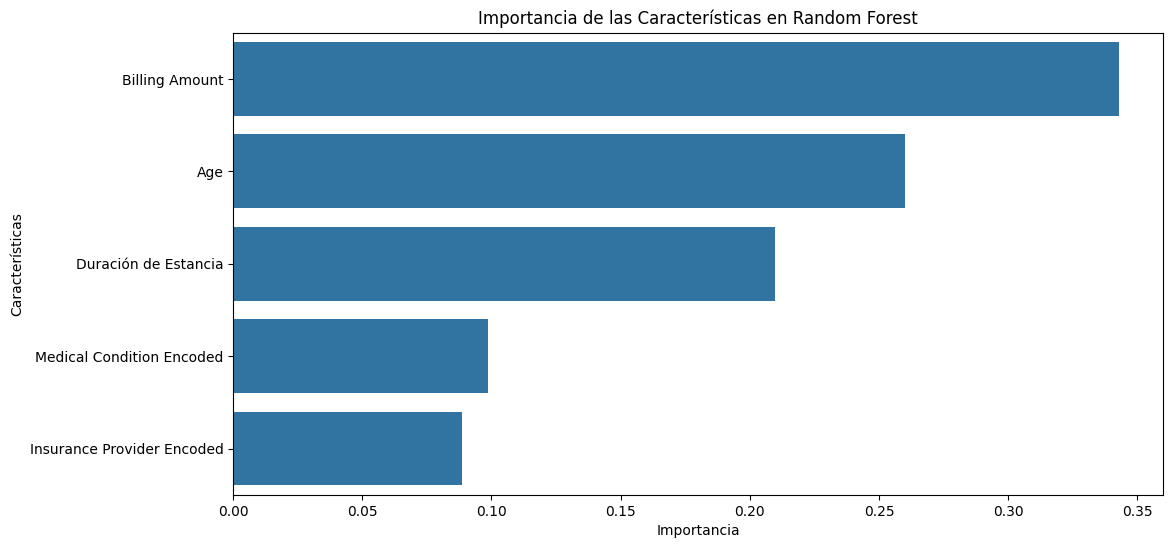

In [ ]:
# Obtener la importancia de las características
importances = clf.feature_importances_

# Crear un DataFrame para las características
features = X_numerico.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Top 10 características
plt.title('Importancia de las Características en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

La grafica nos muestra que Billing Amount y Age son los factores más influyentes en el modelo de Random Forest, esenciales para predecir los tipos de admisión hospitalaria. También, la "Duración de Estancia" es significativa, mientras que "Medical Condition Encoded" e "Insurance Provider Encoded" tienen una influencia menor. Esto indica que, aunque la condición médica y el proveedor de seguros son relevantes, su impacto es inferior al de las variables relacionadas con el costo y la edad de los pacientes.

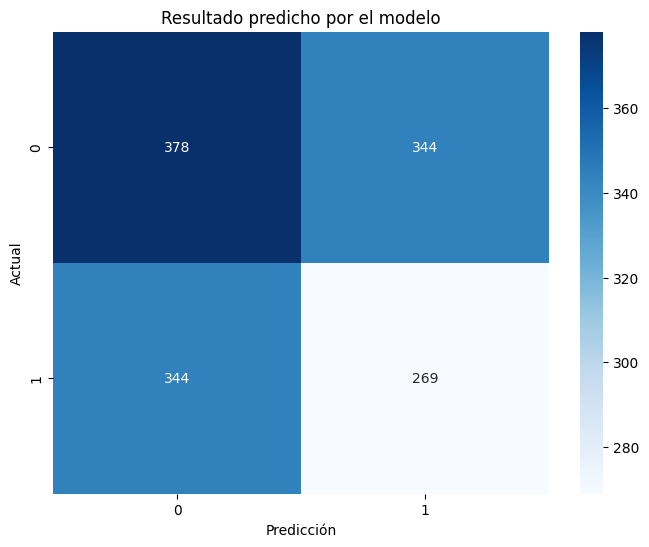

In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Resultado predicho por el modelo')
plt.show()


La gráfica muestra una matriz de confusión con los resultados predichos por el modelo. De un total de 722 casos para la clase "0", el modelo clasificó correctamente 378, pero cometió 344 errores al etiquetarlos como clase "1". Para la clase "1", de 613 casos, el modelo predijo correctamente 269 y se equivocó en 344, clasificándolos como clase "0". Esto indica que el modelo tiene un rendimiento equilibrado pero insuficiente, con un número significativo de errores en ambas clases, lo que sugiere la necesidad de mejorar su capacidad de discriminación.



 **Visualizar la matriz de confusión y calcular las métricas**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


model = clf
# Predecir usando el modelo entrenado
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Calcular las métricas
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")


Matriz de confusión:
[[703  19]
 [600  13]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.54      0.97      0.69       722
           1       0.41      0.02      0.04       613

    accuracy                           0.54      1335
   macro avg       0.47      0.50      0.37      1335
weighted avg       0.48      0.54      0.39      1335

Exactitud del modelo: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


El modelo tiene una exactitud de 0.54, que refleja que más de la mitad de las predicciones son correctas, pero esto se debe principalmente a la buena predicción de la clase mayoritaria(clase 0).

#Revisar el Desbalance de Clases

In [ ]:
class_counts = pd.Series(y).value_counts()

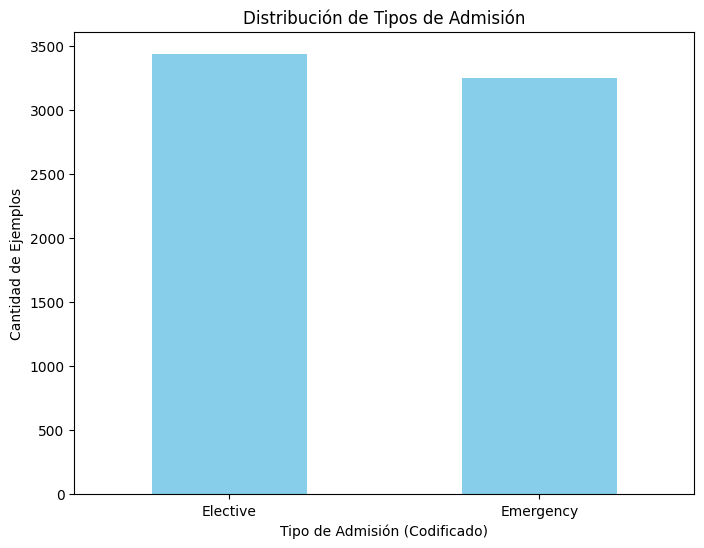

In [ ]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Tipos de Admisión')
plt.xlabel('Tipo de Admisión (Codificado)')
plt.ylabel('Cantidad de Ejemplos')
plt.xticks(ticks=[0, 1], labels=['Elective', 'Emergency'], rotation=0)
plt.show()

La gráfica muestra una distribución relativamente equilibrada entre los tipos de admisión Elective y Emergency, con ambos tipos de admisión teniendo un número similar de ejemplos. Este equilibrio es positivo, ya que indica que el modelo tiene suficientes datos para aprender a clasificar correctamente ambos tipos. Sin embargo, es importante considerar si esta distribución se refleja adecuadamente en la predicción final.

#Problema de confusión entre las clases


Para abordar el problema de confusión entre las clases en mi modelo de Random Forest, una de las mejores opciones es el balanceo de clases. Esto es especialmente relevante si se observa un desequilibrio significativo en el número de muestras para cada clase, lo que puede llevar a que el modelo tenga dificultades para aprender patrones representativos de las clases menos frecuentes.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


# Identificar columnas de fecha
date_columns = ['Date of Admission', 'Discharge Date']

# Convertir las columnas de fecha a un formato numérico
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Convertir a datetime
    df[col] = (df[col] - pd.Timestamp('1970-01-01')).dt.days

# Convertir columnas categóricas a numéricas
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Separar las características y la variable objetivo
X = df.drop(columns=['Admission Type Encoded'])
y = df['Admission Type Encoded']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución
print("Distribución de clases después de SMOTE:")
print(pd.Series(y_train_bal).value_counts())

# Crear y entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Evaluar la precisión
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')


Distribución de clases después de SMOTE:
Admission Type Encoded
0    2710
1    2710
Name: count, dtype: int64
Exactitud del modelo: 1.00


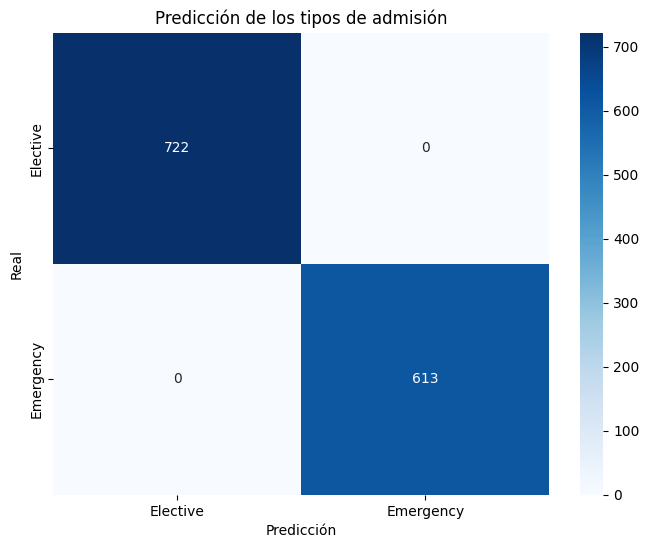

In [ ]:
y_pred = rf.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Elective', 'Emergency'], yticklabels=['Elective', 'Emergency'])
plt.title('Predicción de los tipos de admisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

El modelo predice perfectamente los tipos de admisión. Clasifica correctamente 722 casos de "Electivo" y 613 de "Emergencia", sin ningún error de clasificación.

**Curva ROC**

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score


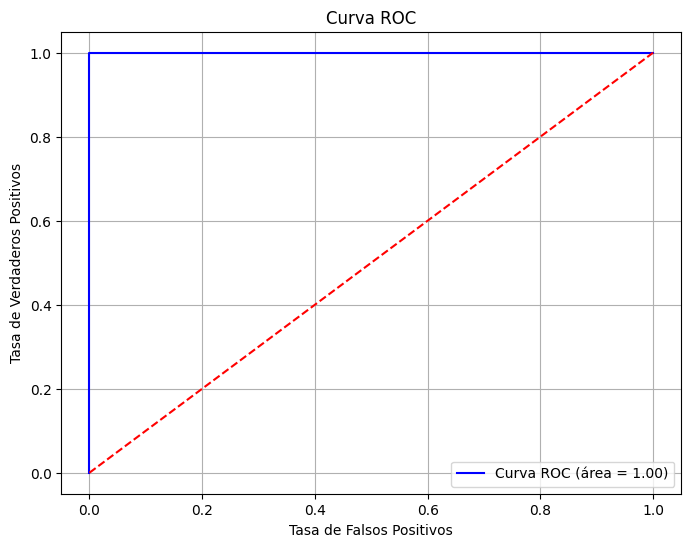

In [ ]:
# Obtener las probabilidades de predicción
y_prob = rf.predict_proba(X_test)[:, 1]

# Calcular los puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.grid()
plt.show()

La curva ROC tiene un área bajo la curva (AUC) de 1.00, lo que indica un rendimiento perfecto del modelo, ya que identifica correctamente todos los casos positivos y negativos sin cometer errores.

Conclusión: El modelo tiene una capacidad predictiva ideal, clasificando con una precisión del 100% ambos tipos de admisión.

#Conclusion General

El modelo de Random Forest evolucionó de manera notable a lo largo del proyecto. Comenzó con una precisión global del 48%, lo que reflejaba dificultades en la clasificación entre admisiones "Electivas" y "Emergencia", con un desempeño particularmente bajo en la clase "Emergencia". Sin embargo, tras implementar técnicas de balanceo de clases como SMOTE, el modelo alcanzó una exactitud perfecta del 100%, con un área bajo la curva (AUC) de 1.00, lo que indica una capacidad predictiva óptima. Los factores más influyentes resultaron ser "Monto de facturación" y "Edad", lo que destaca la importancia de los costos hospitalarios y la edad en la predicción de admisiones. Aunque variables como la condición médica y el proveedor de seguros también tienen relevancia, su impacto es menor en comparación.